In [86]:
import sys
sys.path.append('../dqn/')

In [87]:
from gym import wrappers
from atari_wrappers import *
from dqn_utils import *
import random
import os.path as osp
import gym
import time
import sys
import imp
imp.reload(gym)
imp.reload(wrappers)

<module 'gym.wrappers' from '/Users/chris/anaconda/envs/env_class_deepRL/lib/python3.5/site-packages/gym/wrappers/__init__.py'>

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

# Exploring CQ

In [89]:
sys.path.append('../crystal_quest/')
import crystal_quest_env as cq
import imp 
imp.reload(cq) # reload after making changes

<module 'crystal_quest_env' from '../crystal_quest/crystal_quest_env.py'>

In [126]:
env = cq.Wave1Env(num_aliens=1,num_crystals=20,num_asteroids=1,obs_type=1)

792
(975, 2)


In [127]:
print(env.observation_space)
print(env.action_space)

Box(50,)
Discrete(5)


In [128]:
type(env.observation_space)

gym.spaces.box.Box

In [129]:
type(env.observation_space) == gym.spaces.Box

True

In [130]:
obs = env.reset()
obs.shape
obs

array([ 0,  0,  0,  1,  5, 12,  8, 15,  3, 23,  6,  8, 19,  5,  9,  7, 17,
       21, 36, 15, 23, 22, 12, 16, 24,  5, 19, 17, 32,  6, 12, 21, 26,  8,
       36,  4, 20, 24, 10, 23, 24, 21,  5,  6,  3, 14, 38, 24,  0,  2], dtype=uint8)

In [131]:
env.ship_location

array([0, 0])

In [132]:
env.ship_velocity

array([0, 1])

In [133]:
env.crystal_locations

array([[ 5, 12],
       [ 8, 15],
       [ 3, 23],
       [ 6,  8],
       [19,  5],
       [ 9,  7],
       [17, 21],
       [36, 15],
       [23, 22],
       [12, 16],
       [24,  5],
       [19, 17],
       [32,  6],
       [12, 21],
       [26,  8],
       [36,  4],
       [20, 24],
       [10, 23],
       [24, 21],
       [ 5,  6]])

In [134]:
type(env.action_space)      == gym.spaces.Discrete

True

In [135]:
env.ship_velocity.astype('uint8')

array([0, 1], dtype=uint8)

In [149]:
replay_buffer = ReplayBuffer(1000, 1)
last_obs = env.reset()


for t in range(1000):
    idx = replay_buffer.store_frame(last_obs)
    recent_history= replay_buffer.encode_recent_observation()
    action = env.action_space.sample()
    obs, reward, done,info = env.step(action)
    replay_buffer.store_effect(idx,action,reward,done)
    if done:
        obs = env.reset()
    last_obs= obs.copy()

In [150]:
replay_buffer.reward

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,   0.,   0.,   0.,
        10.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [161]:
replay_buffer.obs[89,:]

array([  8,   9,   1,   0,   6,   4,   9,  17,  25,  15,   9,  20,  28,
        22,  23,  12,   5,  22,  35,  11,  33,  19,  38,   6,  16,  23,
        23,  20,  32,   6,   8,  10,   4,   5,   6,  24,   4,   6,   4,
         9,  15,   9,  12,  13,  22,  12,  32,  24, 254,   0], dtype=uint8)

In [162]:
batch_size=32
obs_t_batch, act_t_batch, rew_batch, obs_tp1_batch, done_mask = replay_buffer.sample(batch_size)


In [163]:
act_t_batch

array([0, 0, 2, 3, 2, 4, 4, 3, 2, 2, 2, 2, 0, 2, 1, 4, 0, 1, 2, 0, 0, 2, 4,
       0, 4, 0, 4, 2, 3, 4, 1, 0], dtype=int32)

In [164]:
obs_t_batch.shape

(32, 50)

In [165]:
obs_t_batch[0,:]

array([ 1,  1,  1,  0, 15, 10, 30, 24, 28, 15,  6, 12, 35, 13,  7,  4, 29,
       19, 12, 18, 24, 14, 37,  4, 38, 22, 32, 13, 26,  7, 29, 22, 29,  5,
       17, 17, 34,  7, 15,  7,  3, 13, 12, 24, 34, 19, 36,  4,  2,  0], dtype=uint8)

In [173]:
obs_t_batch[6,:]

array([  8,  17, 255,   0,   6,   4,   9,  17,  25,  15,   9,  20,  28,
        22,  23,  12,   5,  22,  35,  11,  33,  19,  38,   6,  16,  23,
        23,  20,  32,   6,   8,  10,   4,   5,   6,  24,   4,   6,   4,
         9,  15,   9,  12,  13,  22,  12,  38,  20,   0,   2], dtype=uint8)

In [167]:
np.array([-2.0]).astype('uint8')

array([254], dtype=uint8)

In [172]:
rew_batch[6]

10.0

In [169]:
done_mask

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [170]:
obs_t_batch[1,:]/255

array([ 0.02745098,  0.00392157,  0.00392157,  0.        ,  0.05882353,
        0.03921569,  0.11764706,  0.09411765,  0.10980392,  0.05882353,
        0.02352941,  0.04705882,  0.1372549 ,  0.05098039,  0.02745098,
        0.01568627,  0.11372549,  0.0745098 ,  0.04705882,  0.07058824,
        0.09411765,  0.05490196,  0.14509804,  0.01568627,  0.14901961,
        0.08627451,  0.1254902 ,  0.05098039,  0.10196078,  0.02745098,
        0.11372549,  0.08627451,  0.11372549,  0.01960784,  0.06666667,
        0.06666667,  0.13333333,  0.02745098,  0.05882353,  0.02745098,
        0.01176471,  0.05098039,  0.04705882,  0.09411765,  0.13333333,
        0.0745098 ,  0.07843137,  0.01568627,  0.        ,  0.00784314])

# Manual Control

In [667]:
sys.path.append('../crystal_quest/')
import crystal_quest_env as cq
import imp 
imp.reload(cq) # reload after making changes

<module 'crystal_quest_env' from '../crystal_quest/crystal_quest_env.py'>

912
(975, 2)


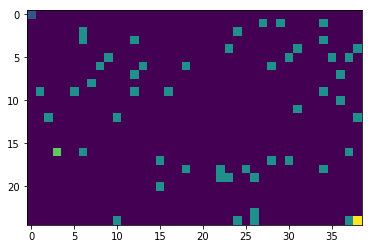

In [668]:
env = cq.Wave1Env(num_aliens=1,num_crystals=50,num_asteroids=1,obs_type=0)
obs = env.reset()
plt.imshow(obs[:,:,0].T)

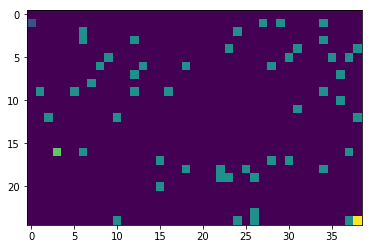

In [669]:
obs, reward, done,info = env.step(2)
plt.imshow(obs[:,:,0].T)

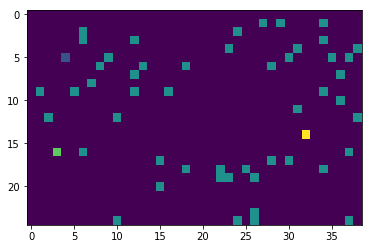

In [689]:
obs, reward, done,info = env.step(4)
plt.imshow(obs[:,:,0].T)

In [690]:
def local_crystals(env):
    local_crystal_distance = np.zeros(5)
    # left right up down 
    for a,act in enumerate([[-1,0],[1,0],[0,-1],[0,1]]):
        for steps_in_act in range(6):
            newloc = env.ship_location+np.array(act)*(steps_in_act)
            crystal = any((newloc == x).all() for x in env.crystal_locations)
            if crystal:
                local_crystal_distance[a]=1.0/(steps_in_act+1.0)
    if reward>0:
        local_crystal_distance[4]=1.0
    return(local_crystal_distance)

In [696]:
#def closest_crystal(env):
    

In [699]:
np.argmin(np.sqrt(np.sum(((env.crystal_locations-env.ship_location)**2),axis=1)))

31

In [700]:
#env.crystal_locations
env.crystal_locations[np.argmin(np.sqrt(np.sum(((env.crystal_locations-env.ship_location)**2),axis=1)))]

array([5, 9])

In [701]:
#env.crystal_locations[np.sqrt(np.sum(((env.crystal_locations-env.ship_location)**2),axis=1))<8]

0
False
[ 0.   0.2  0.   0.   0. ]


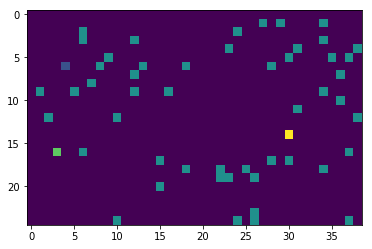

In [694]:
obs, reward, done,info = env.step(2)
print(reward)
print(done)
print(local_crystals(env))
plt.imshow(obs[:,:,0].T)

# Testing in Env

In [825]:
sys.path.append('../crystal_quest/')
import crystal_quest_env as cq
import imp 
imp.reload(cq) # reload after making changes
env = cq.Wave1Env(num_aliens=1,num_crystals=100,num_asteroids=1,obs_type=2)
obs = env.reset()


912
(975, 2)


[ 0.  0.  0.  0.  0.]


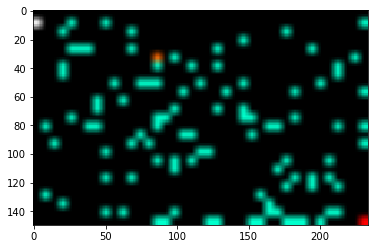

In [826]:
obs,_,_,_=env.step(env.action_space.sample())
print(obs)
plt.imshow(env._return_img())

# Testing in Env

In [827]:
sys.path.append('../crystal_quest/')
import crystal_quest_env as cq
import imp 
imp.reload(cq) # reload after making changes
env = cq.Wave1Env(num_aliens=1,num_crystals=100,num_asteroids=1,obs_type=3)
obs = env.reset()


912
(975, 2)


[ 3.  2.  1.  1.  0.]


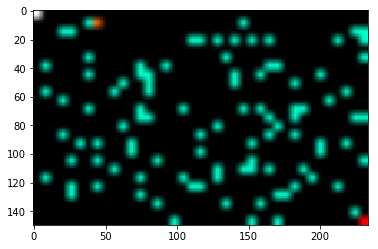

In [828]:
obs,_,_,_=env.step(env.action_space.sample())
print(obs)
plt.imshow(env._return_img())

In [831]:
env.episode_deaths

0